# Assignment Information

- Assignment: Homework 6
- Author: Charles Hoyt
- Due: June 10, 2016
- Language: R
- Posted: https://github.com/cthoyt/notebooks/blob/master/bit/AbiHomework6.ipynb

In [1]:
version

               _                           
platform       x86_64-apple-darwin15.4.0   
arch           x86_64                      
os             darwin15.4.0                
system         x86_64, darwin15.4.0        
status                                     
major          3                           
minor          3.0                         
year           2016                        
month          05                          
day            03                          
svn rev        70573                       
language       R                           
version.string R version 3.3.0 (2016-05-03)
nickname       Supposedly Educational      

# Exercise 1

Install package colonCA from the bioconductor homepage (http://www.bioconductor.org) containing gene expression measurements from 22 normal and 40 colon cancer patients (Alon et al., 1999). Read the manual pages for R-package colonCA and further documentation on the web to see, how you can work with ExpressionSet objects.

In [2]:
source("https://bioconductor.org/biocLite.R")
biocLite("colonCA")

library(colonCA)
data(colonCA)

Bioconductor version 3.3 (BiocInstaller 1.22.2), ?biocLite for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.3 (BiocInstaller 1.22.2), R 3.3.0 (2016-05-03).
Installing package(s) ‘colonCA’
Old packages: 'Biostrings', 'jsonlite', 'limma', 'nlme', 'openssl', 'plyr',
  'stringi', 'survival'
Loading required package: Biobase
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:stats’:

    IQR, mad, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colnames, do.call,
    duplicated, eval, evalq, Filter, Find, get, grep, grepl, intersect,
    is.unsorted, lapply, lengths, Map, map

## Exercise 1A

A typical first question when looking at such data is to understand the relationship of all 62 samples to each other. One popular method for that purpose is the Principal Component Analysis (PCA). Perform a PCA of these data using method prcomp in R, after applying a log-transformation (i.e. A  log(A), if A is the original expression matrix). Caution: the original expression data is in the format genes x samples! (4 + 1 points)

In [3]:
exprs_transformed = log(t(exprs(colonCA)))
head(exprs_transformed)

,Hsa.3004,Hsa.13491,Hsa.13491.1,Hsa.37254,Hsa.541,Hsa.20836,Hsa.1977,Hsa.44472,Hsa.3087,Hsa.1447,⋯,Hsa.2618,Hsa.27285,Hsa.41260,Hsa.14822,Hsa.336,Hsa.984,Hsa.35124,Hsa.3952,Hsa.32734,Hsa.9683
1,9.05828649232617,8.60671208861435,8.35782458854215,8.31015426172538,7.59984690263786,8.57212256724023,7.68235340595106,7.92783649465887,8.92617079016685,8.43547975551991,⋯,4.59623034441862,4.2130160919396,5.5603354172443,4.9337542497603,4.47994704123401,3.68059523452624,4.21700457495799,4.32651392474362,4.42508612413433,3.35689712276558
2,9.12306532386474,8.81277349059506,8.49360721627671,8.22098420124465,7.6084836495624,8.62513417480156,8.25558424162678,7.93501119099843,8.85619508290379,8.47683983706702,⋯,4.84253217453986,4.5243938759608,4.56726061291487,5.01456091209873,4.40964180170686,4.4430041353977,5.02519544542759,5.22880650378391,3.79481480452261,2.81959157583512
3,8.24949934995024,8.84942215234902,8.58857760089513,8.45651919338082,7.06180595380906,7.36021210963581,7.18946957965413,7.29455391412629,8.10075307765495,7.93257031644854,⋯,5.0230907353636,4.41546141076012,3.43720781918519,5.26744570288095,4.34341573554623,5.41441008553489,3.44137917129499,3.7532617130432,2.77819796100429,2.71866038021423
4,8.73976858135734,8.96489113833564,8.69212752977617,8.28792089766885,7.60220660876967,7.66413074769918,7.33376783497796,7.44695259288384,8.26095552098561,8.51507294528214,⋯,5.02782011885036,3.73002139744511,1.78002421300963,5.20954079615719,4.3112017288936,4.21523387949755,3.87825937527534,3.74997455347375,3.91162292540681,2.77819796100429
5,8.08033957818065,8.21458697250605,8.13174833398139,8.15006090240006,7.68773131987656,7.98029049714013,7.63494150176551,7.9890789775127,8.10269843849341,8.04218827656501,⋯,4.83992605263047,4.33859707674655,5.08357591849797,4.12228393091134,3.99930101353521,5.40878481957401,4.29182836675573,4.05352256770185,2.01356879752913,3.45978070576105
6,7.82816949758745,7.58103132989967,7.35648419794902,8.0303509857322,7.50119261539307,7.42270837301137,7.16272302576095,7.81029185462363,7.423890780363,7.17992515705339,⋯,4.80835589796135,3.86157146193205,4.99206390851082,3.34321509912381,3.50254987592244,4.52015681166113,1.77155676191054,3.5918177412708,2.28442112236637,3.08557297755378


In [4]:
pca = prcomp(exprs_transformed, center = TRUE, scale = TRUE) 

In [5]:
summary(pca)

Importance of components:
                           PC1      PC2      PC3      PC4     PC5     PC6
Standard deviation     30.6326 13.40696 10.61215 10.48417 9.53231 7.91018
Proportion of Variance  0.4692  0.08987  0.05631  0.05496 0.04543 0.03129
Cumulative Proportion   0.4692  0.55905  0.61536  0.67032 0.71575 0.74704
                           PC7     PC8     PC9    PC10    PC11    PC12   PC13
Standard deviation     7.35723 6.16634 5.33286 4.98229 4.70539 4.59140 4.2894
Proportion of Variance 0.02706 0.01901 0.01422 0.01241 0.01107 0.01054 0.0092
Cumulative Proportion  0.77410 0.79311 0.80733 0.81974 0.83081 0.84136 0.8506
                          PC14    PC15    PC16    PC17    PC18    PC19    PC20
Standard deviation     4.19729 3.76421 3.62989 3.55737 3.44239 3.30742 3.23274
Proportion of Variance 0.00881 0.00708 0.00659 0.00633 0.00593 0.00547 0.00523
Cumulative Proportion  0.85936 0.86645 0.87304 0.87936 0.88529 0.89076 0.89598
                          PC21    PC22    PC23    

## Exercise 1B

Conduct a 2D PCA plot. In that plot mark in cancer and normal patients with a different color (Tip: pData(colonCA)$$class indicates the class of each patient). What do you observe? (4 + 1 points)

In [6]:
colors = pData(colonCA)$class
colors

[1] t n t n t n t n t n t n t n t n t n t n t n t n t t t t t t t t t t t t t t
[39] n t t n n t t t t n t n n t t n n t t t t n t n
Levels: n t

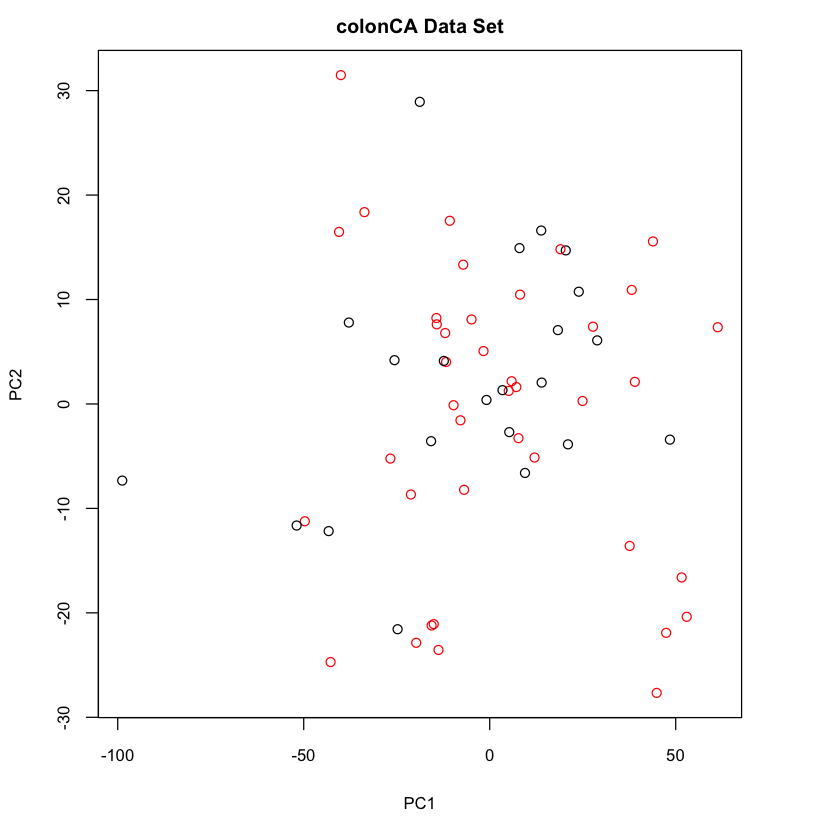

In [7]:
plot(pca$x[,1:2], col=pData(colonCA)$class, main='colonCA Data Set')

The data were not seperable into the two annotated classes based on the first two principle components. More components will be necessary to better explain the data and make a better seperation. The number of components necessary can be determined by a scree plot of the eigenvalues. More specifically, the cumulative sum of the normalized eigenvalues will elucidate when 80%, 90%, 95%, and ultimately (but unnecessarily) 100% of the variances are explained.

##  Exercise 1C

Draw a scree plot of the eigenvalues and interpret the results. (2 + 1 points)

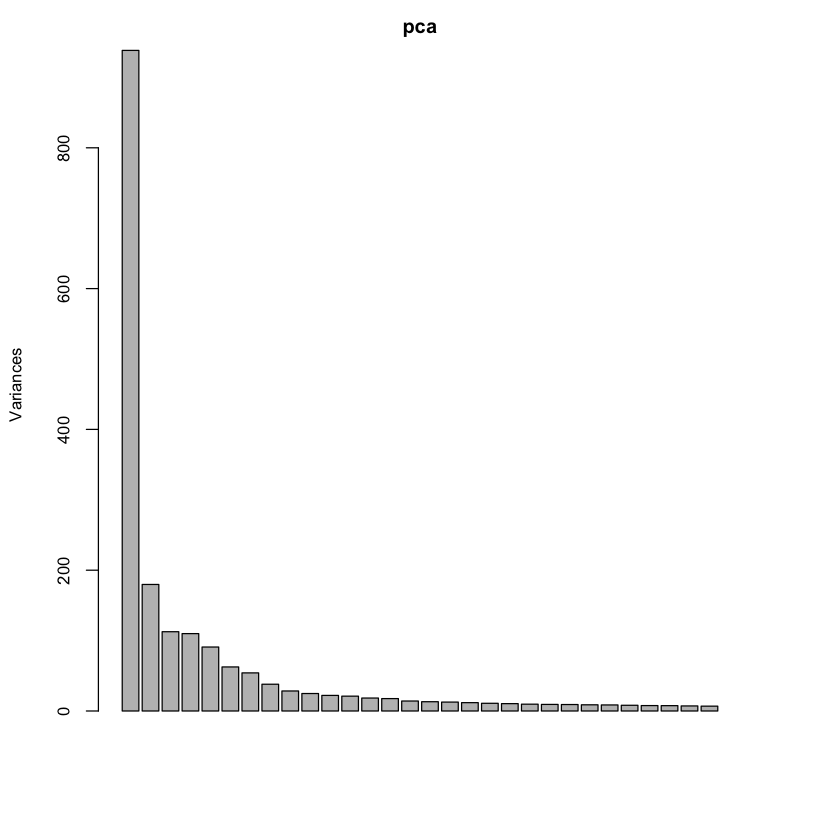

In [16]:
screeplot(pca, 30)

The scree plot shows that the first two principle components explain more of the variances than the rest, but the cumulative sum of the normalized eigenvalues shows numerically that they are still not sufficient. This is better explained in 1D.

## Exercise 1D

Which proportion of the overall variance do the first 2 principal components explain? How many principal components would you need to explain 90% and 95% of the overall variance? (4 + 1 points)

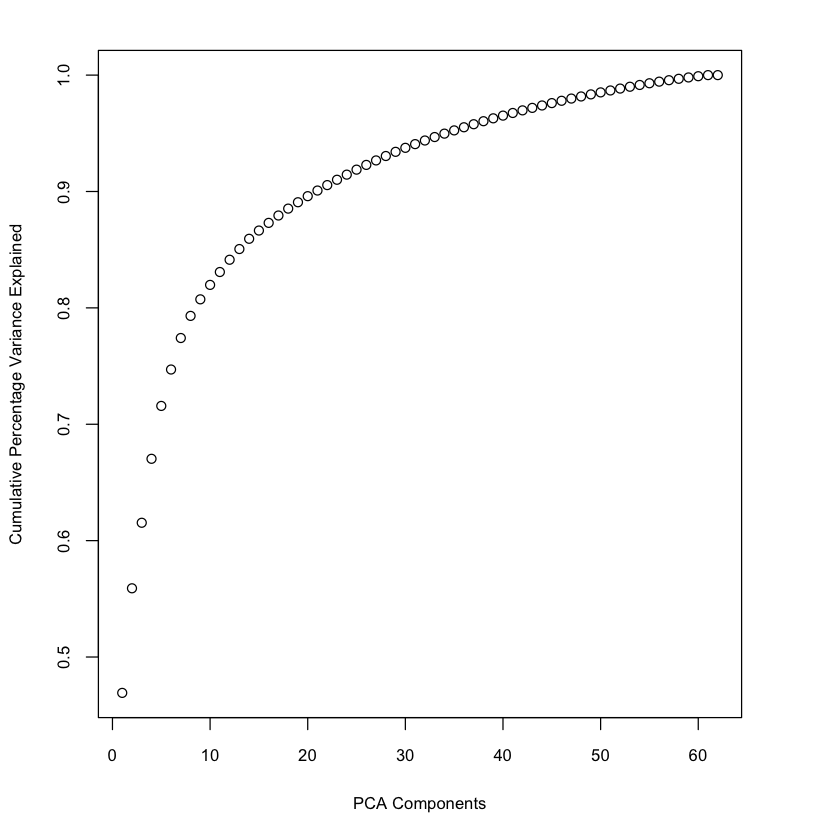

In [17]:
plot(cumsum(pca$sdev^2 / sum(pca$sdev^2)), xlab='PCA Components', ylab='Cumulative Percentage Variance Explained')

Around 10 components are necessary to explain 80% of the variance, more than 20 are required to explain 90% of the variance, and almost 40 are required to explain 95% of the variance. When considering the original number of genes sequenced in this data set, this dimensionality reduction is incredibly successful. Even being conservative with 95% means there are fewer descriptors than samples, and overfitting can be much better avoided than before. Additionally, some of these descriptors may be further filtered with other feature selection techniques.

# Exercise 2

Cluster the following 6 samples on paper using average linkage hierarchical clustering (UPGMA): A1 = (0; 10); A2 = (2; 2); A3 = (2; 4); A4 = (8; 8); A5 = (7; 6); A6 = (10; 9). Plot the resulting dendrogram. For a working example of the method see: http://en.wikipedia.org/wiki/UPGMA (6 points + 1 bonus point)
  

Starting distances

- $d(1,2) = \sqrt{(0-2)^2 +  (10-2)^2} = \sqrt{68} \approx 8.24$
- $d(1,3) = \sqrt{(0-2)^2 +  (10-4)^2} = \sqrt{52} \approx 7.21$ 
- $d(1,4) = \sqrt{(0-8)^2 +  (10-8)^2} = \sqrt{68} \approx 8.24$
- $d(1,5) = \sqrt{(0-7)^2 +  (10-6)^2} = \sqrt{65} \approx 8.06$
- $d(1,6) = \sqrt{(0-10)^2 + (10-9)^2} = \sqrt{101} \approx 10.05$
- $d(2,3) = \sqrt{(2-2)^2 + (2-4)^2} = \sqrt{4} = 2$
- $d(2,4) = \sqrt{(2-8)^2 + (2-8)^2} = \sqrt{72} \approx 8.49$
- $d(2,5) = \sqrt{(2-7)^2 + (2-6)^2} = \sqrt{41} \approx 6.40$
- $d(2,6) = \sqrt{(2-10)^2 + (2-9)^2} = \sqrt{113} \approx 10.63$
- $d(3,4) = \sqrt{(2-8)^2 + (4-8)^2} = \sqrt{52} \approx 7.21$
- $d(3,5) = \sqrt{(2-8)^2 + (4-6)^2} = \sqrt{61} \approx 7.81$
- $d(3,6) = \sqrt{(2-10)^2 + (4-9)^2} = \sqrt{89} \approx 9.43$
- $d(4,5) = \sqrt{(8-7)^2 + (8-6)^2} = \sqrt{5} \approx 2.24$
- $d(4,6) = \sqrt{(8-10)^2 + (8-9)^2} = \sqrt{5} \approx 2.24$
- $d(5,6) = \sqrt{(7-10)^2 + (6-9)^2} = \sqrt{18} \approx 4.24$

Points 2 and 3 are closest, so merge points 2 and 3 into cluster 7.

Remaining clusters: 1, 4, 5, 6, 7 (2,3)

- $d(1,4) \approx 8.24$
- $d(1,5) \approx 8.06$
- $d(1,6) \approx 10.05$
- $d(4,5) \approx 2.24$
- $d(4,6) \approx 2.24$
- $d(5,6) \approx 4.24$
- $d(7,1) = \frac{1 * d(2,1) + 1 * d(3,1)}{1 + 1} = \frac{8.24 + 7.21}{2} \approx 7.75$
- $d(7,4) = \frac{1 * d(2,4) + 1 * d(3,4)}{1 + 1} = \frac{8.49 + 7.21}{2} \approx 7.85$
- $d(7,5) = \frac{1 * d(2,5) + 1 * d(3,5)}{1 + 1} = \frac{6.40 + 7.81}{2} \approx 7.11$
- $d(7,6) = \frac{1 * d(2,6) + 1 * d(3,6)}{1 + 1} = \frac{10.63 + 9.43}{2} \approx 10.03$

Branch Lengths:

$\delta(7, n_1) = \delta(n_1, 2) = \delta(n_1, 3) = \frac{d(2,3)}{2} = \frac{2}{2} = 1$

Points 4 and 5 are closest, so merge 4 and 5 into cluster 8. Randomly chosen instead of 4 and 6. This could affect the results.

Remaining clusters: 1, 6, 7 (2,3), 8 (4,5)

- $d(1,6) \approx 10.05$
- $d(7,1) \approx 7.75$
- $d(7,6) \approx 10.03$
- $d(8,1) = \frac{1 * d(4,1) + 1 * d(5,1)}{1 + 1} = \frac{8.24 + 8.06}{2} \approx 8.15$
- $d(8,6) = \frac{1 * d(4,6) + 1 * d(5,6)}{1 + 1} = \frac{2.24 + 4.24}{2} \approx 3.24$
- $d(8,7) = \frac{1 * d(4,7) + 1 * d(5,7)}{1 + 1} = \frac{7.85 + 7.11}{2} \approx 7.48$

Branch Lengths:

$\delta(8, n_2) = \delta(n_2, 4) = \delta(n_2, 5) = \frac{d(4,5)}{2} = \frac{2.24}{2} \approx 1.12$

Clusters 8 and 6 are closest. Merge Clusters 8 and 6 into cluster 9.

Remaining clusters: 1,7 (2,3),9 (4,5,6)

- $d(7,1) \approx 7.75$
- $d(9,1) = \frac{1 * d(6,1) + 2 * d(8,1)}{1 + 2} = \frac{10.05 + 2 * 8.15}{3} \approx 8.78$
- $d(9,7) = \frac{1 * d(6,7) + 2 * d(8,7)}{1 + 2} = \frac{10.03 + 2 * 7.48}{3} \approx 8.33$

Branch Lengths:

$\delta(9, n_3) = \delta(n_3, 6) = \delta(n_3, 8) = \frac{d(6,8)}{2} = \frac{3.24}{2} \approx 1.62$

$\delta(n_3, n_2) = \delta(n_3, 8) - \delta(n_2, 4) = 1.62 - 1.12 \approx 0.5$

Clusters 9 and 1 are closest. Merge clusters 9 and 1 into cluster 10.

Remaining clusters: 7 (2,3), 10 (1,4,5,6)

- $d(10, 7) = \frac{3 * d(9,7) + 2 * d(1,7)}{3 + 2} = \frac{3 * 8.33 + 2 * 7.75}{5} \approx 8.10$

Branch Lenghts:

$\delta(10, n_4) = \delta(n_4, 9) = \delta(n_4, 1) = \frac{d(9,1)}{2} = \frac{8.78}{2} \approx 4.39$

$\delta(n_4, n_3) = \delta(n_4, 1) - \delta(n_3, 6) = 4.39 - 1.62 \approx 2.77$

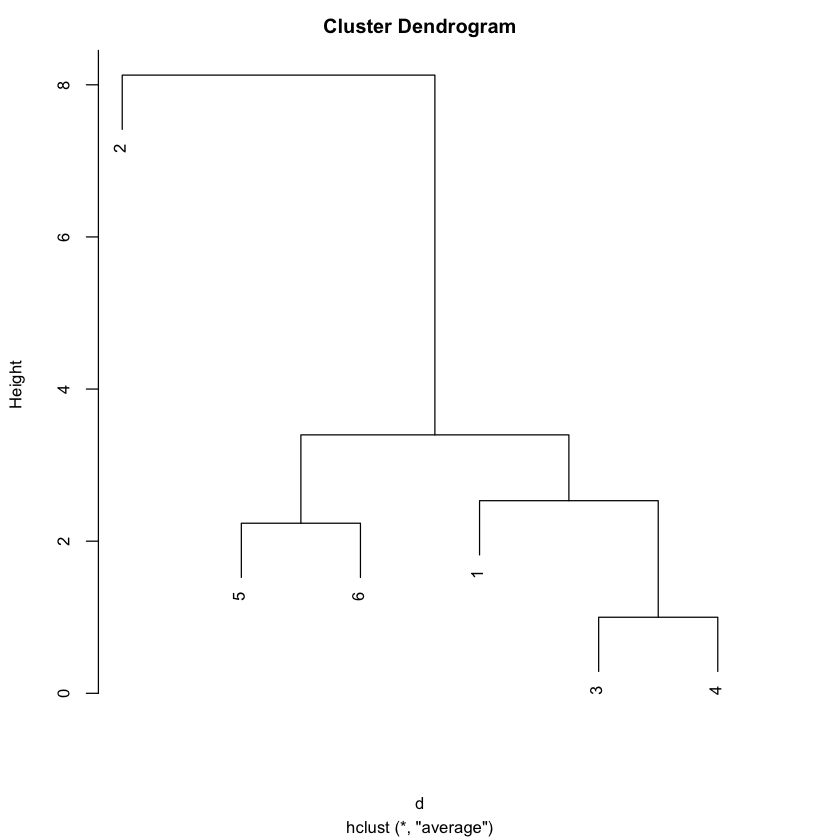

In [23]:
data = matrix(c(0,10,2,2,2,4,8,8,7,6,10,9), nrow=6, ncol=2)
d = dist(data)
hc = hclust(d, method='average')
plot(hc)